In [1]:
# Data & Plot Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
# Load the dataset

income=pd.read_csv('Household Income.csv')

In [3]:
print(income)

    Year  Income
0   1999   51291
1   2000   55761
2   2001   54779
3   2002   53087
4   2003   51402
5   2004   51815
6   2005   57476
7   2006   64648
8   2007   67333
9   2008   73127
10  2009   70247
11  2010   70883
12  2011   69354
13  2012   72093
14  2013   76933
15  2014   83788
16  2015   90527
17  2016  101873
18  2017  109601
19  2018  110601
20  2019  121795
21  2020  121722
22  2021  119776


In [4]:
# create a fitted model
lm = smf.ols(formula='Income ~ Year', data=income).fit()

#print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           7.30e-12
Time:                        20:05:39   Log-Likelihood:                -238.28
No. Observations:                  23   AIC:                             480.6
Df Residuals:                      21   BIC:                             482.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.777e+06   5.05e+05    -13.416      0.0

In [5]:
ypred = lm.predict({'Year': [2023]})
ypred = ypred.item()
pred = "${:,.2f}".format(ypred)


#pred = pred.apply(lambda x: '${:,.2f}'.format(x))
print("The predicted household income for 2023 in San Francisco is:",pred)

The predicted household income for 2023 in San Francisco is: $122,595.73


In [6]:
ypred = lm.predict({'Year': [2022]})
ypred = ypred.item()
pred = "${:,.2f}".format(ypred)


#pred = pred.apply(lambda x: '${:,.2f}'.format(x))
print("The predicted household income for 2022 in San Francisco is:",pred)

The predicted household income for 2022 in San Francisco is: $119,185.06


In [7]:
from scipy import stats

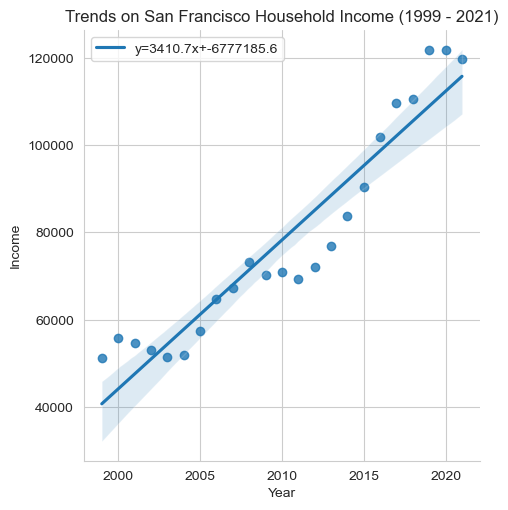

In [10]:
tips = sns.load_dataset("tips")
slope, intercept, r_value, p_value, std_err = stats.linregress(income['Year'],income['Income'])
# Using seabron to create a linear fit
sns.lmplot(x='Year',y='Income',data = income, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
plt.legend()
plt.title("Trends on San Francisco Household Income (1999 - 2021)")

plt.show()